# **Video Game Sales Analysis**

## **About The DataSet**

This data set contains  a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com

Data explanation provided:

* **Rank:** Ranking of overall sales.

* **Name:** The games name.

* **Platform:** Platform of the games release.

* **Year:** Year of the game's release.

* **Genre:** Genre of the game.

* **Publisher:** Publisher of the game.

* **NA_Sales:** Sales in North America (in millions).

* **EU_Sales:** Sales in Europe (in millions).

* **JP_Sales:** Sales in Japan (in millions).

* **Other_Sales:** Sales in the rest of the world (in millions).

* **Global_Sales:** Total worldwide sales.

## **Libraries**

In [1]:
from matplotlib.patches import ConnectionPatch
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the data
data = pd.read_csv("vgsales.csv")

# Inspecting the data
print("_" * 40)
print("\nThe shape of the DataSet is {}\n".format(data.shape))
print("_" * 40)

data

________________________________________

The shape of the DataSet is (16598, 11)

________________________________________


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## **Understanding The Data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
print("_" * 40)
print(f'\nNumber of platforms: {data.Platform.unique().size}\n\nNumber of genres: {data.Genre.unique().size}\n\nNumber of publishers: {data.Publisher.unique().size}\n')
print("_" * 40)

________________________________________

Number of platforms: 31

Number of genres: 12

Number of publishers: 579

________________________________________


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [6]:
data.describe(include = "O").transpose()

,count,unique,top,freq
Name,16598,11493,Need for Speed: Most Wanted,12
Platform,16598,31,DS,2163
Genre,16598,12,Action,3316
Publisher,16540,578,Electronic Arts,1351


In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
data["Year"].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [9]:
data.loc[(data["Year"] >= 2017), ["Year", "Name", "Global_Sales"]]

,Year,Name,Global_Sales
5957,2020.0,Imagine: Makeup Artist,0.29
14390,2017.0,Phantasy Star Online 2 Episode 4: Deluxe Package,0.03
16241,2017.0,Phantasy Star Online 2 Episode 4: Deluxe Package,0.01
16438,2017.0,Brothers Conflict: Precious Baby,0.01



**Imagine: Makeup Artist**
* Year: 04/16/2009*

**Phantasy Star Online 2 Episode 4 Deluxe Package:**
* Year: 04/14/2016*

**Brothers Conflict: Precious Baby**
* Year: 04/7/2016*

In [10]:
data.loc[5957, "Year"] = 2009
data.loc[[14390, 16241, 16438], "Year"] = 2016
data["Year"].value_counts()

2009.0    1432
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     347
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year, dtype: int64

In [11]:
# Dealing with mising data
data["Publisher"] = data["Publisher"].fillna("Unknown")
data = data.dropna()
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
platform = data.groupby("Platform")["Global_Sales"].mean()
genre = data.groupby("Genre")["Global_Sales"].mean()
publisher = data.groupby("Publisher")["Global_Sales"].mean()

categoric = ["Name", "Publisher", "Genre", "Platform"]
continuous = data.drop(["Name", "Publisher", "Genre", "Platform"], axis = 1).columns

df_cat = data[categoric]
df_cont = data[continuous]

In [13]:
data["Year"] = data["Year"].astype(int)

In [14]:
df_cont = df_cont.drop("Year", axis = 1)
df_cont.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,16327.0,8292.868194,4792.669778,1.00,4136.50,8295.00,12441.50,16600.00
NA_Sales,16327.0,0.265415,0.821591,0.00,0.00,0.08,0.24,41.49
EU_Sales,16327.0,0.147554,0.508766,0.00,0.00,0.02,0.11,29.02
JP_Sales,16327.0,0.078661,0.311557,0.00,0.00,0.00,0.04,10.22
Other_Sales,16327.0,0.048325,0.189885,0.00,0.00,0.01,0.04,10.57
Global_Sales,16327.0,0.540232,1.565732,0.01,0.06,0.17,0.48,82.74


## **Sales Analysis**

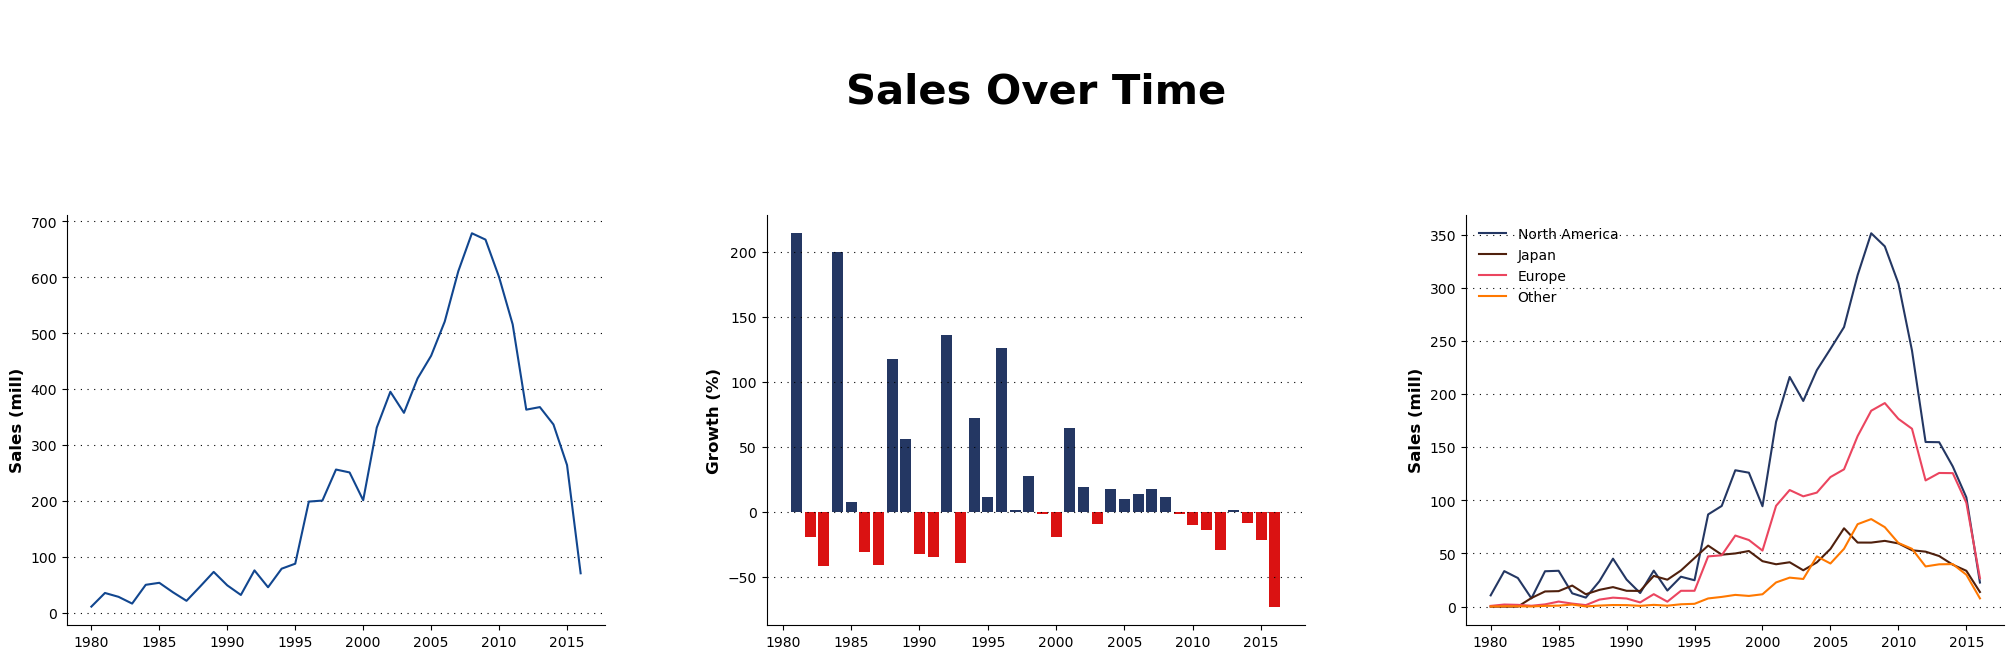

In [15]:
# VARIABLES
syr = data.groupby('Year')[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']].sum()
syg = pd.DataFrame(data.groupby("Year")["Global_Sales"].sum())
syg['Growth'] = round(syg.pct_change() * 100, 2)
colors = ["#243763" if i > 0 else "#DA1212" for i in syg["Growth"]]

# POSITION
fig = plt.figure(figsize = (25,8))
gs = fig.add_gridspec(nrows = 2, ncols = 3, hspace = - 0.5, wspace = 0.3)
ax_title = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax_title.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# TITLE
ax_title.spines[["top", "left", "right", "bottom"]].set_visible(False)
ax_title.tick_params(left = False, bottom = False)
ax_title.set(xticks = [], yticks = [])
ax_title.text(0.5,0.8,
         'Sales Over Time',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize = 30, fontweight='bold',
         color="#000000")

# GLOBAL SALES
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.lineplot(data = syg, x = "Year", y = "Global_Sales", ax = ax1, color = "#11468F")
ax1.set_xlabel("")
ax1.set_ylabel("Sales (mill)", fontsize = 12, fontweight = "bold")

# GLOBAL GROWTH
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x=syg.index,height = syg['Growth'], color = colors)
ax2.set_xlabel("")
ax2.set_ylabel("Growth (%)", fontsize = 12, fontweight = "bold")

# REGIONAL SALES
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.lineplot(ax=ax3,data=syr,x=syr.index,y = 'NA_Sales', color = '#243763', label='North America')
sns.lineplot(ax=ax3,data=syr,x=syr.index,y = 'JP_Sales', color = '#4F200D', label='Japan')
sns.lineplot(ax=ax3,data=syr,x=syr.index,y = 'EU_Sales', color = '#EB455F', label='Europe')
sns.lineplot(ax=ax3,data=syr,x=syr.index,y = 'Other_Sales', color = '#FF7800', label='Other')
ax3.set_xlabel('')
ax3.set_ylabel("Sales (mill)", fontsize = 12, fontweight='bold')
ax3.legend(framealpha = 0, loc = 'best')

for i in ["top", "right"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

Between 1994 and 2008, the video game industry saw remarkable expansion, with a notable shift toward 3D graphics and the launch of popular consoles including the Sony PlayStation, Sega Saturn, and Nintendo 64. The industry experienced its two most extensive growth periods from 1994 to 1998 and 2004 to 2008, which happened to occur over similar time frames in two different decades.

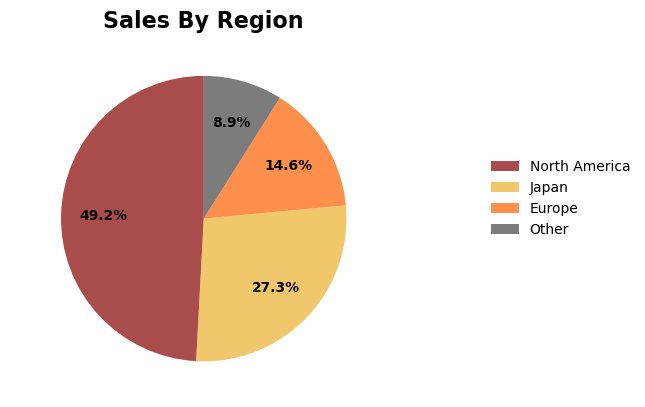

In [16]:
# VARIABLES
total_sales = data["Global_Sales"].sum()
sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(lambda x: x.sum (), axis = 0)
pct = sales.divide(total_sales)

labels = ["North America", "Japan", "Europe", "Other"]
colors = ["#850000", "#EBB02D", "#FF6000", "#454545"]
sizes = pct

# POSITION
fig = plt.figure(figsize = (5,5))
gs = fig.add_gridspec(nrows = 2,ncols = 1, hspace = 0.05, height_ratios = (0.05, 0.95))
ax_title = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background) 
ax_title.set_facecolor(background) 
ax1.set_facecolor(background)

# TITLE
ax_title.spines[["top", "left", "right", "bottom"]].set_visible(False)
ax_title.tick_params(left=False, bottom=False)
ax_title.set(xticks=[], yticks=[])
ax_title.text(0.5,0.5,
         'Sales By Region',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize = 16, fontweight='bold',
         color="#000000")

# PIE
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 10, 'fontweight': 'bold'}, startangle = 90, pctdistance = 0.7)
ax1.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
for i in ax1.patches:
    i.set_alpha(0.7)
ax1.legend(colors, labels = labels, loc = 'upper center', bbox_to_anchor = (1, -0.3, 1, 1), framealpha = 0)

plt.show()

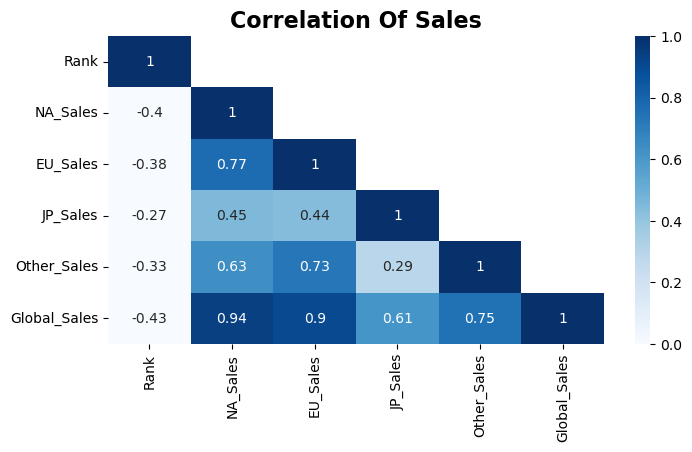

In [17]:
# CORRELATION MATRIX
corr = df_cont.corr()

# HIDING THE UPPER TRIANGLE
mask = np.triu(np.ones_like(corr), k = 1)

# PLOTING THE MARIX
fig, ax = plt.subplots(figsize = (8,4))
sns.heatmap(corr, annot = True, cmap = "Blues", vmin = 0, vmax = 1, ax = ax, mask = mask)
ax.set_title("Correlation Of Sales", fontsize = 16, fontweight = "bold")
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 10)

plt.show()

The correlation between Japan and Global Sales is comparatively lower than other regions. We will investigate this by analyzing Games, Publishers, and Genres across different regions. As North America holds nearly half of the Global Sales, its figures exert a significant influence on the overall sales, and thus, it was anticipated that there would be a strong correlation between the two.

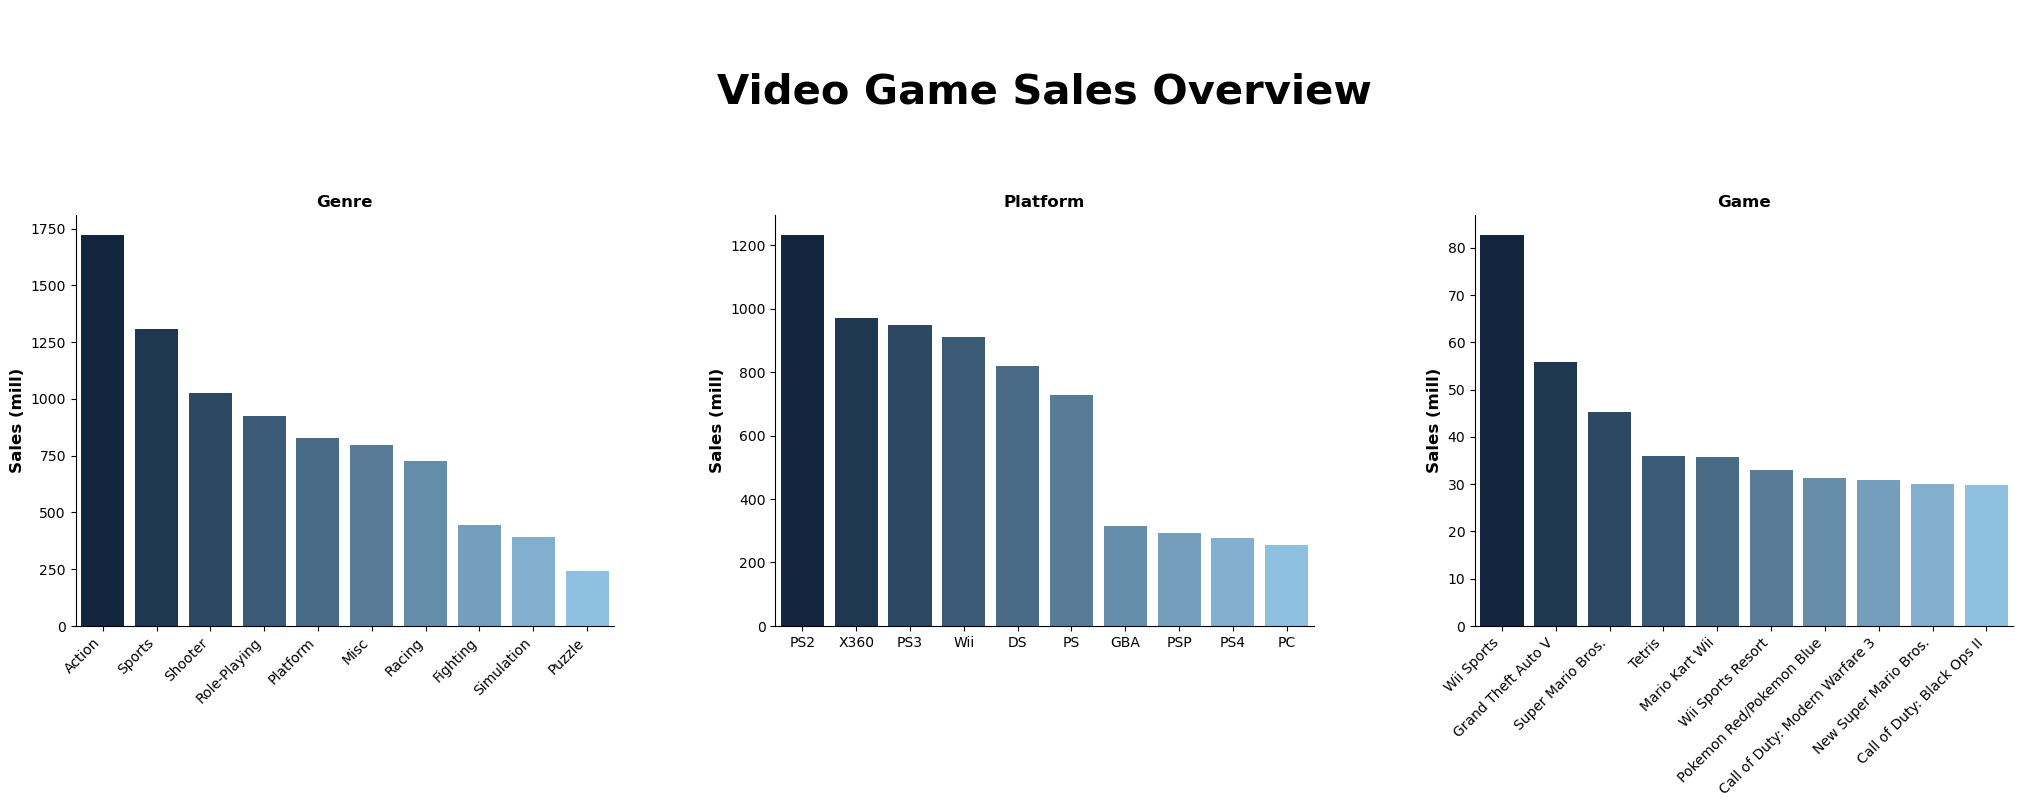

In [18]:
# VARIABLES
genre = pd.DataFrame(data.groupby("Genre")["Global_Sales"].sum().sort_values(ascending = False).head(10))
platform = pd.DataFrame(data.groupby("Platform")["Global_Sales"].sum().sort_values(ascending = False).head(10))
game = pd.DataFrame(data.groupby("Name")["Global_Sales"].sum().sort_values(ascending = False).head(10))

#POSITION
fig = plt.figure(figsize = (25,8))
gs = fig.add_gridspec(nrows = 2, ncols = 3, hspace = - 0.5, wspace = 0.3)
ax_title = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax_title.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# TITLE
ax_title.spines[["bottom", "left", "top", "right"]].set_visible(False)
ax_title.tick_params(left = False, bottom = False)
ax_title.set(xticks = [], yticks = [])
ax_title.text(0.5,0.8,
    "Video Game Sales Overview",
    horizontalalignment = "center",
    verticalalignment = "center",
    fontsize = 30,
    fontweight = "bold"
)

# GENRE
ax1.set_title("Genre", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(data = genre, x = genre.index, y = "Global_Sales", palette = sns.blend_palette(["#0A2647", "#82C3EC"], n_colors = 10), ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha = "right")
ax1.set_xlabel("")
ax1.set_ylabel("Sales (mill)", fontsize = 12, fontweight = "bold")

# PLATFORM
ax2.set_title("Platform", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(data = platform, x = platform.index, y = "Global_Sales", palette = sns.blend_palette(["#0A2647", "#82C3EC"], n_colors = 10), ax = ax2)
ax2.set_xlabel("")
ax2.set_ylabel("Sales (mill)", fontsize = 12, fontweight = "bold")

# GAME
ax3.set_title("Game", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(data = game, x = game.index, y = "Global_Sales", palette = sns.blend_palette(["#0A2647", "#82C3EC"], n_colors = 10), ax = ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 45, ha = "right")
ax3.set_xlabel("")
ax3.set_ylabel("Sales (mill)", fontsize = 12, fontweight = "bold")

for i in ["right", "top"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

plt.show()

## **Publisher**

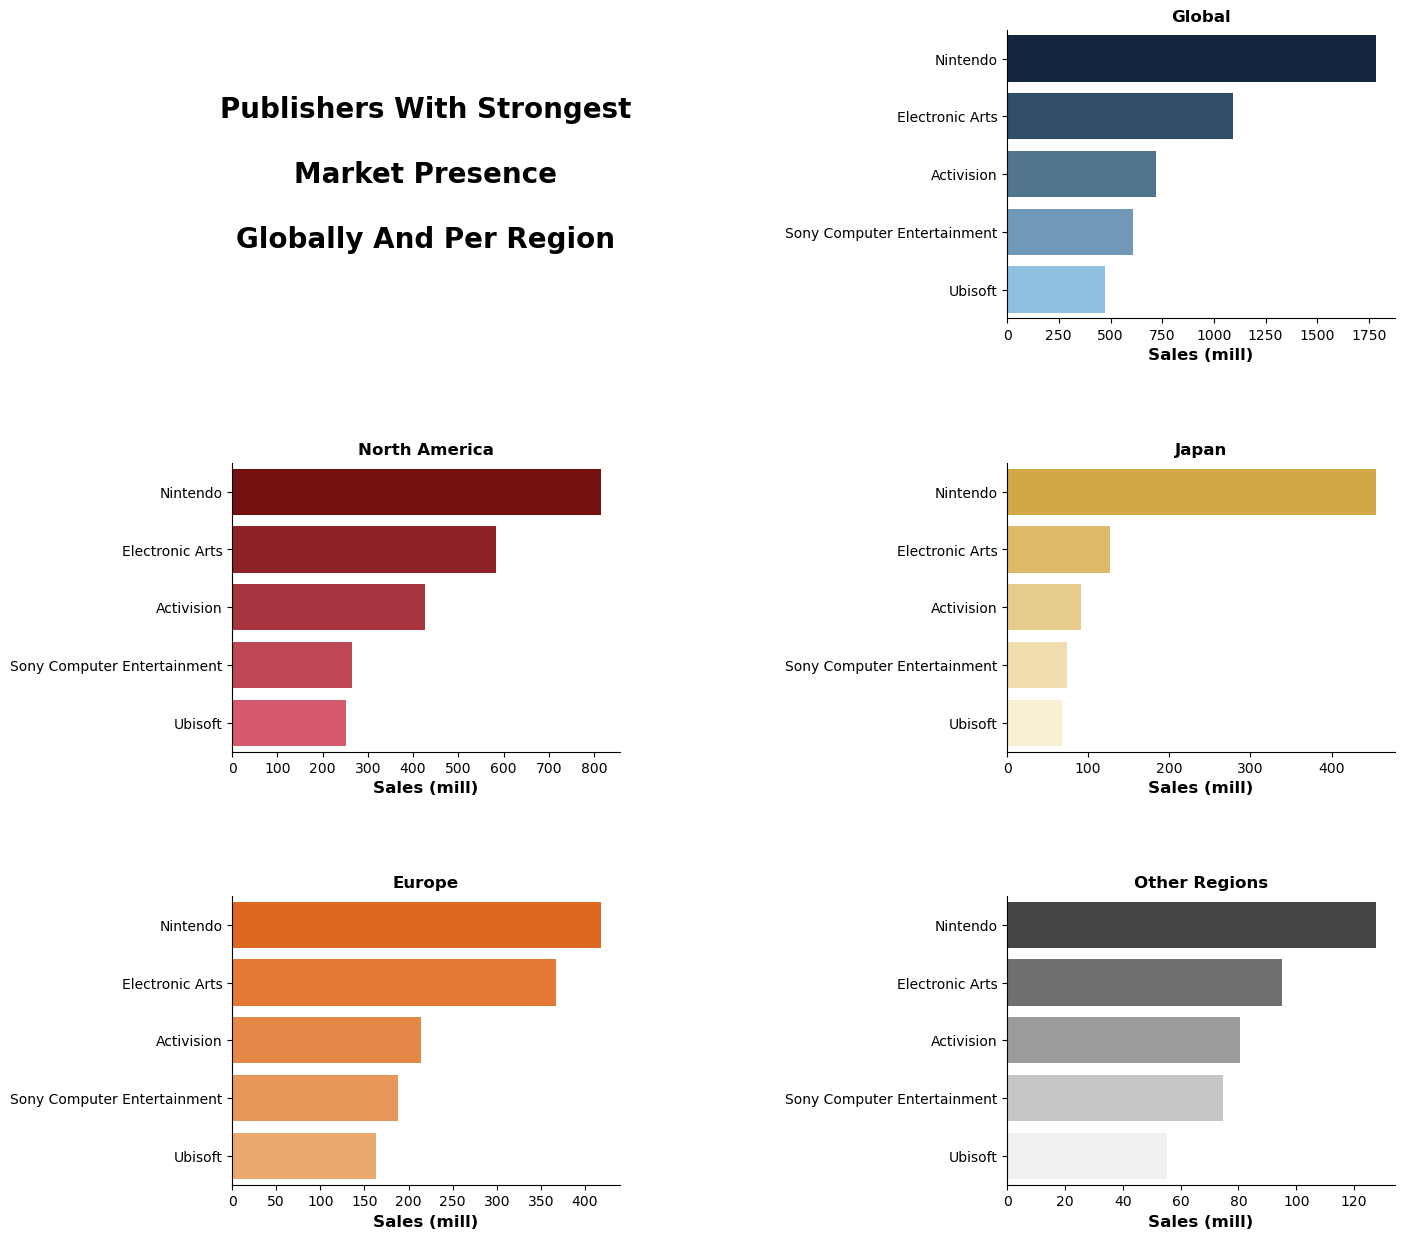

In [19]:
# VARIABLES
na = pd.DataFrame(data.groupby("Publisher")["NA_Sales"].sum().sort_values(ascending = False).head(5))
jp = pd.DataFrame(data.groupby("Publisher")["JP_Sales"].sum().sort_values(ascending = False).head(5))
eu = pd.DataFrame(data.groupby("Publisher")["EU_Sales"].sum().sort_values(ascending = False).head(5))
oth = pd.DataFrame(data.groupby("Publisher")["Other_Sales"].sum().sort_values(ascending = False).head(5))
glo = pd.DataFrame(data.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending = False).head(5))

# POSITION
fig = plt.figure(figsize = (15,15))
gs = fig.add_gridspec(nrows = 3, ncols = 3, hspace = .5, wspace = 0)
ax_title = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,2])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,2])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,2])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background) 
ax_title.set_facecolor(background) 
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)
ax4.set_facecolor(background)
ax5.set_facecolor(background)

# TITLE
ax_title.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax_title.tick_params(left = False, bottom = False)
ax_title.set(xticks = [], yticks = [])
ax_title.text(0.5,0.5,
         'Publishers With Strongest\n\nMarket Presence\n\nGlobally And Per Region',
         horizontalalignment ='center',
         verticalalignment ='center',
         fontsize = 20, fontweight ='bold',
         color ="#000000")

# GLOBAL
ax1.set_title("Global", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(
    data = glo,
    x = "Global_Sales",
    y = glo.index,
    palette = sns.blend_palette(["#0A2647", "#82C3EC"], n_colors = 5),
    ax = ax1)
ax1.set_yticklabels(ax1.get_yticklabels())
ax1.set_xlabel("Sales (mill)", fontsize = 12, fontweight = "bold")
ax1.set_ylabel("")

# NORTH AMERICA
ax2.set_title("North America", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(
    data = na,
    x = "NA_Sales",
    y = eu.index,
    palette = sns.blend_palette(["#850000", "#EB455F"], n_colors = 5),
    ax = ax2)
ax2.set_yticklabels(ax1.get_yticklabels())
ax2.set_xlabel("Sales (mill)", fontsize = 12, fontweight = "bold")
ax2.set_ylabel("")

# JAPAN
ax3.set_title("Japan", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(
    data = jp,
    x = "JP_Sales",
    y = eu.index,
    palette = sns.blend_palette(["#EBB02D", "#FFF2CC"], n_colors = 5),
    ax = ax3)
ax3.set_yticklabels(ax1.get_yticklabels())
ax3.set_xlabel("Sales (mill)", fontsize = 12, fontweight = "bold")
ax3.set_ylabel("")

# EUROPE
ax4.set_title("Europe", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(
    data = eu,
    x = "EU_Sales",
    y = eu.index,
    palette = sns.blend_palette(["#FF6000", "#FFA559"], n_colors = 5),
    ax = ax4)
ax4.set_yticklabels(ax1.get_yticklabels())
ax4.set_xlabel("Sales (mill)", fontsize = 12, fontweight = "bold")
ax4.set_ylabel("")

# OTHERS
ax5.set_title("Other Regions", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(
    data = oth,
    x = "Other_Sales",
    y = oth.index,
    palette = sns.blend_palette(["#454545", "#F0F0F0"], n_colors = 5),
    ax = ax5)
ax5.set_yticklabels(ax1.get_yticklabels())
ax5.set_xlabel("Sales (mill)", fontsize = 12, fontweight = "bold")
ax5.set_ylabel("")

for i in ["top", "right"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

plt.show()

**What is the percentage of the total sales in a region that is contributed by the sales of the leading publishers in that same region?**

In [20]:
# PERCENTAGE
na_pct = round((na['NA_Sales'].sum() / data['NA_Sales'].sum()) * 100, 2)
jp_pct = round((jp['JP_Sales'].sum() / data['JP_Sales'].sum()) * 100, 2)
eu_pct = round((eu['EU_Sales'].sum() / data['EU_Sales'].sum()) * 100, 2)
oth_pct = round((oth['Other_Sales'].sum() / data['Other_Sales'].sum()) * 100, 2)
glo_pct = round((glo['Global_Sales'].sum() / data['Global_Sales'].sum()) * 100, 2)

# DATAFRAME OF PERCENTAGE
pct = pd.DataFrame(
    {
        "Region": ["North America", "Japan", "Europe", "Other", "Global"], 
        "Representation (%)": [na_pct, jp_pct, eu_pct, oth_pct, glo_pct]
    }
)

pct

,Region,Representation (%)
0,North America,54.09
1,Japan,63.40
2,Europe,56.04
3,Other,54.91
4,Global,53.06


## **Games**

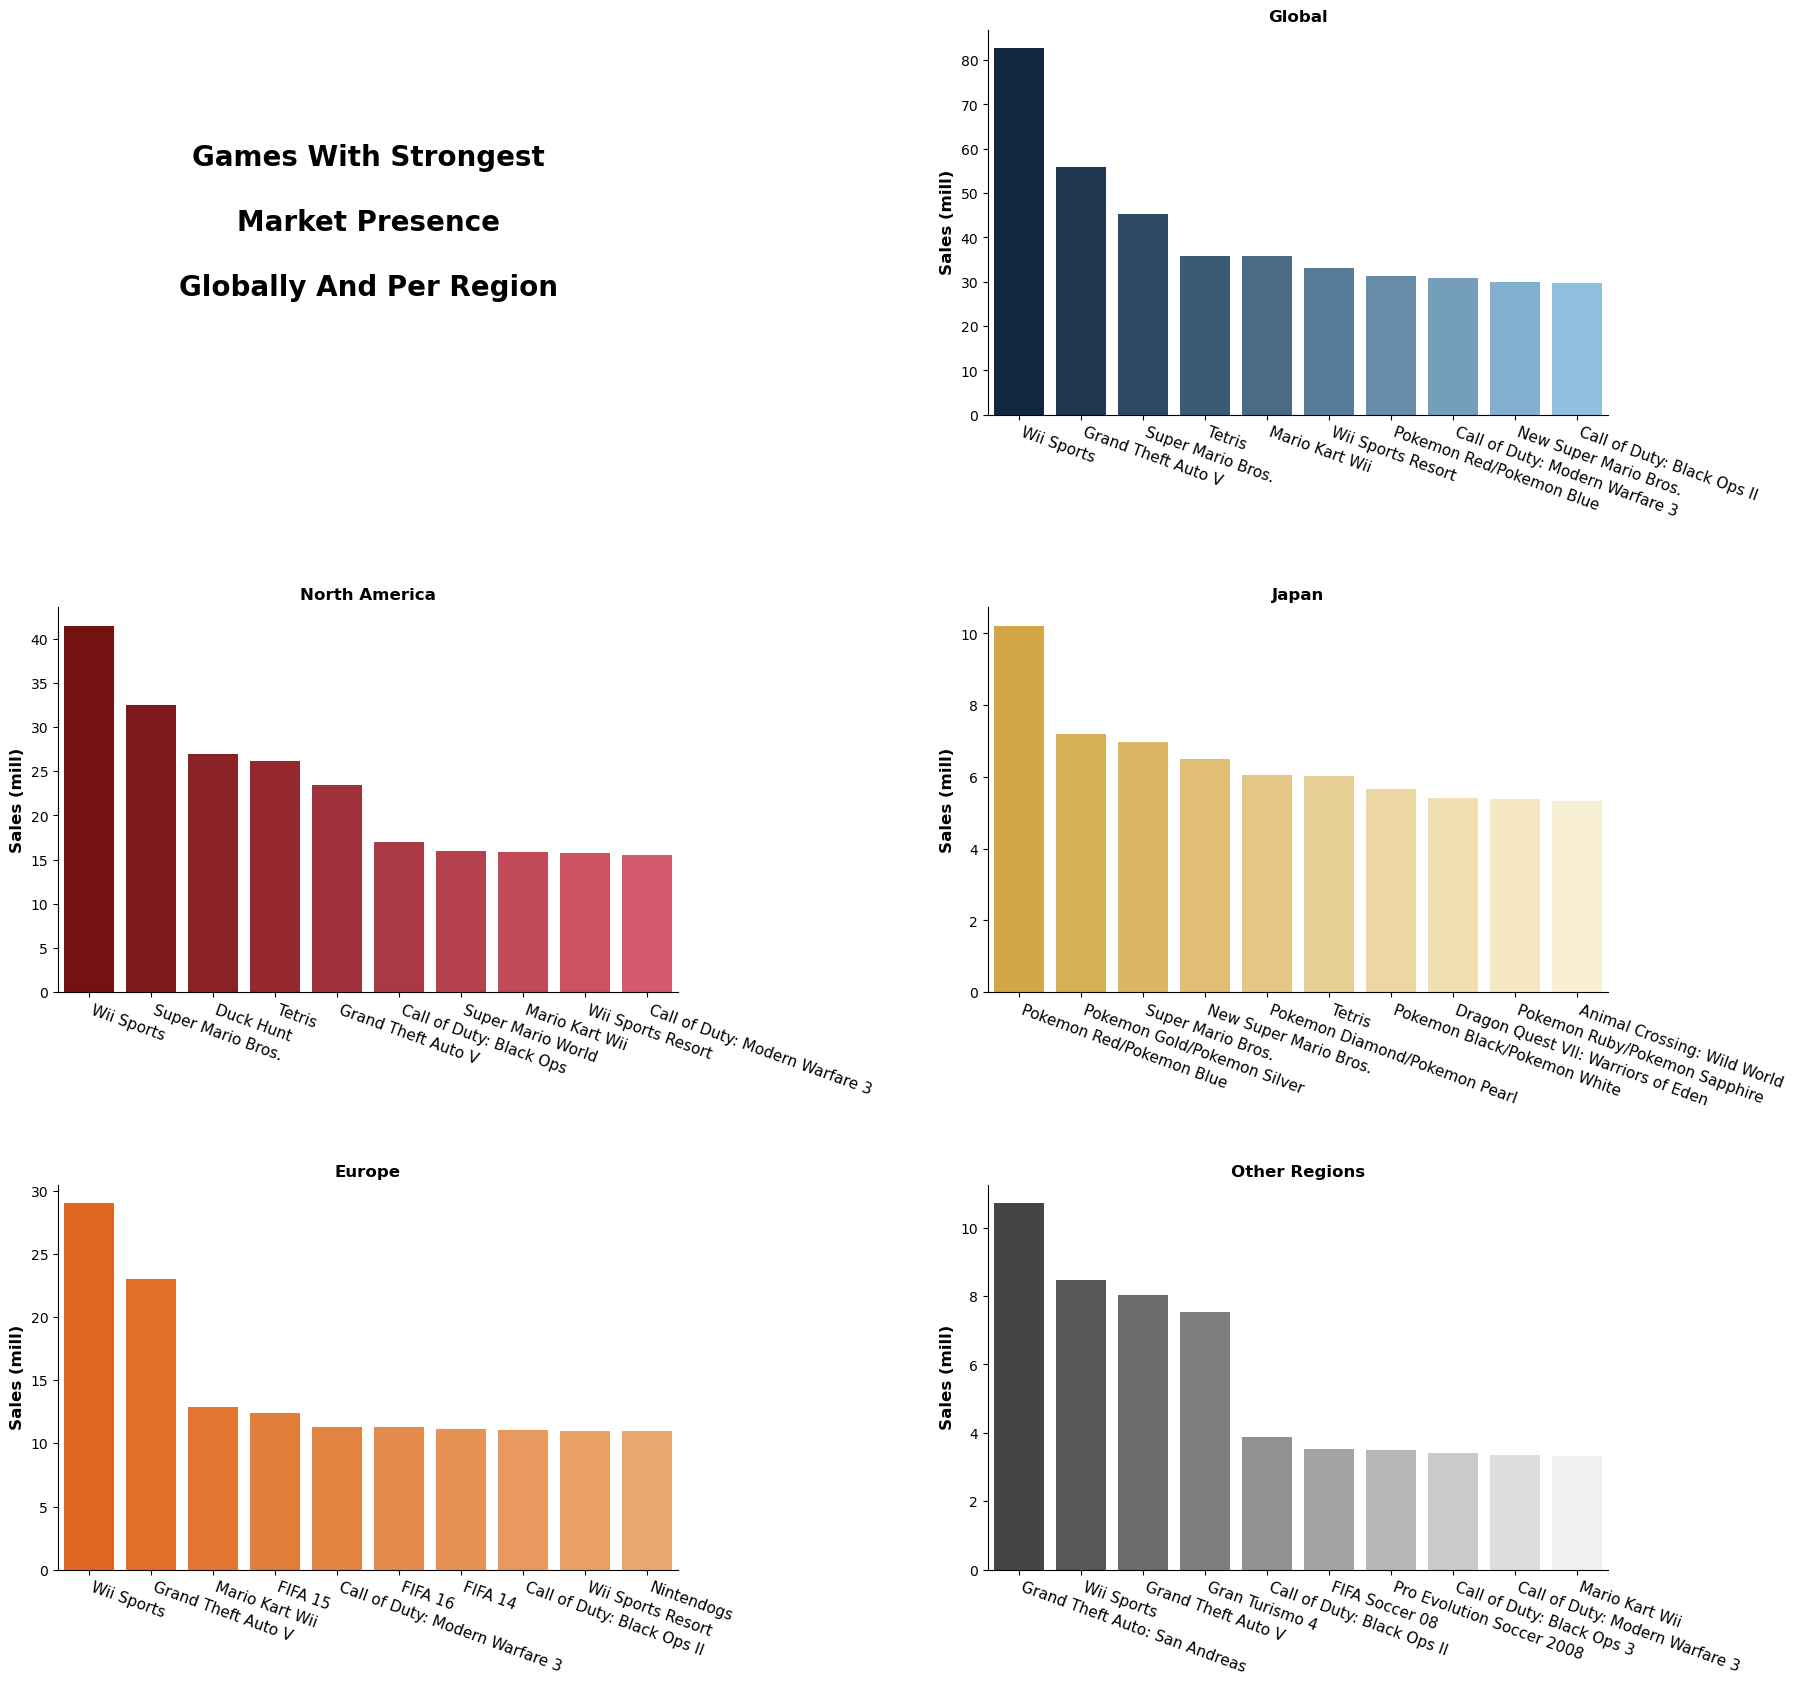

In [21]:
# VARIABLES
na = pd.DataFrame(data.groupby("Name")["NA_Sales"].sum().sort_values(ascending = False).head(10))
jp = pd.DataFrame(data.groupby("Name")["JP_Sales"].sum().sort_values(ascending = False).head(10))
eu = pd.DataFrame(data.groupby("Name")["EU_Sales"].sum().sort_values(ascending = False).head(10))
oth = pd.DataFrame(data.groupby("Name")["Other_Sales"].sum().sort_values(ascending = False).head(10))
glo = pd.DataFrame(data.groupby("Name")["Global_Sales"].sum().sort_values(ascending = False).head(10))

# POSITION
fig = plt.figure(figsize = (20,20))
gs = fig.add_gridspec(nrows = 3, ncols = 2, hspace = 0.5, wspace = 0.5)
ax_title = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

# BACKGROUND
backgroun = "white"
fig.patch.set_facecolor(backgroun)
ax_title.set_facecolor(backgroun)
ax1.set_facecolor(backgroun)
ax2.set_facecolor(backgroun)
ax3.set_facecolor(backgroun)
ax4.set_facecolor(backgroun)
ax5.set_facecolor(backgroun)

# TITLE
ax_title.spines[["top", "left", "right", "bottom"]].set_visible(False)
ax_title.tick_params(left = False, right = False)
ax_title.set(xticks = [], yticks = [])
ax_title.text(0.5,0.5,
         'Games With Strongest\n\nMarket Presence\n\nGlobally And Per Region',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize = 20, fontweight='bold',
         color="#000000")

# GLOBAL
ax1.set_title("Global", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(
    data = glo, 
    x = glo.index, 
    y = "Global_Sales", 
    palette = sns.blend_palette(["#0A2647","#82C3EC"], n_colors = 10), 
    ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-20, ha="left", fontsize = 11)
ax1.set_xlabel("")
ax1.set_ylabel("Sales (mill)", fontsize = 12, fontweight = "bold")

# NORTH AMERICA
ax2.set_title("North America", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(
    data = na, 
    x = na.index, 
    y = "NA_Sales", 
    palette = sns.blend_palette(["#850000","#EB455F"], n_colors = 10), 
    ax = ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-20, ha="left", fontsize = 11)
ax2.set_xlabel("")
ax2.set_ylabel("Sales (mill)", fontsize = 12, fontweight = "bold")

# JAPAN
ax3.set_title("Japan", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(
    data = jp, 
    x = jp.index, 
    y = "JP_Sales", 
    palette = sns.blend_palette(["#EBB02D","#FFF2CC"], n_colors = 10), 
    ax = ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=-20, ha="left", fontsize = 11)
ax3.set_xlabel("")
ax3.set_ylabel("Sales (mill)", fontsize = 12, fontweight = "bold")

# EUROPE
ax4.set_title("Europe", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(
    data = eu, 
    x = eu.index, 
    y = "EU_Sales", 
    palette = sns.blend_palette(["#FF6000","#FFA559"], n_colors = 10), 
    ax = ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=-20, ha="left", fontsize = 11)
ax4.set_xlabel("")
ax4.set_ylabel("Sales (mill)", fontsize = 12, fontweight = "bold")

# OTHERS REGIONS
ax5.set_title("Other Regions", fontsize = 12, fontweight = "bold", loc = "center")
sns.barplot(
    data = oth, 
    x = oth.index, 
    y = "Other_Sales", 
    palette = sns.blend_palette(["#454545","#F0F0F0"], n_colors = 10), 
    ax = ax5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=-20, ha="left", fontsize = 11)
ax5.set_xlabel("")
ax5.set_ylabel("Sales (mill)", fontsize = 12, fontweight = "bold")

for i in ["top", "right"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

plt.show()

**What is the proportion of the total sales in a region that is made up by the sales of the top 10 games in that region?**

In [22]:
# NA
na_pct = round((na['NA_Sales'].sum() / data['NA_Sales'].sum()) * 100, 2)
na_mean = round(na['NA_Sales'].mean(),2)
na_max = round(na['NA_Sales'].max(),2)
na_name = na['NA_Sales'].idxmax()

# JP
jp_pct = round((jp['JP_Sales'].sum() / data['JP_Sales'].sum()) * 100, 2)
jp_mean = round(jp['JP_Sales'].mean(),2)
jp_max = round(jp['JP_Sales'].max(),2)
jp_name = jp['JP_Sales'].idxmax()

# EU
eu_pct = round((eu['EU_Sales'].sum() / data['EU_Sales'].sum()) * 100, 2)
eu_mean = round(eu['EU_Sales'].mean(),2)
eu_max = round(eu['EU_Sales'].max(),2)
eu_name = eu['EU_Sales'].idxmax()

# Other
oth_pct = round((oth['Other_Sales'].sum() / data['Other_Sales'].sum()) * 100, 2)
oth_mean = round(oth['Other_Sales'].mean(),2)
oth_max = round(oth['Other_Sales'].max(),2)
oth_name = oth['Other_Sales'].idxmax()

# Global
glo_pct = round((glo['Global_Sales'].sum() / data['Global_Sales'].sum()) * 100, 2)
glo_mean = round(glo['Global_Sales'].mean(),2)
glo_max = round(glo['Global_Sales'].max(),2)
glo_name = glo['Global_Sales'].idxmax()

rep = pd.DataFrame(
    {
        'Region': ['North America', 'Japan', 'Europe', 'Other', 'Global'], 
        'Top 10 Representation (%)': [na_pct, jp_pct, eu_pct, oth_pct, glo_pct], 
        'Mean Top 10 Sales': [na_mean, jp_mean, eu_mean, oth_mean, glo_mean], 
        'Name (Top Sold Game)': [na_name, jp_name, eu_name, oth_name, glo_name], 
        '$ (Top Sold Game)': [na_max, jp_max, eu_max, oth_max, glo_max]
    }
)

rep

,Region,Top 10 Representation (%),Mean Top 10 Sales,Name (Top Sold Game),$ (Top Sold Game)
0,North America,5.32,23.07,Wii Sports,41.49
1,Japan,5.04,6.47,Pokemon Red/Pokemon Blue,10.22
2,Europe,5.98,14.41,Wii Sports,29.02
3,Other,7.06,5.57,Grand Theft Auto: San Andreas,10.72
4,Global,4.65,41.06,Wii Sports,82.74


## **Conclusions**

Wii Sports emerges as the top game in three regions, namely NA, EU, and Other, while it does not even make it to the top 10 games in Japan. A similar trend is observed for Wii Sports Resort. The top 10 games contribute to only 4.65% of the total sales. Call Of Duty games also have different preferences across regions, with Black Ops being favored in NA, Modern Warfare 3 in Europe, and Black Ops 2 in Other Regions. 

In the NA region, Wii Sports, Super Mario Bros., and Duck Hunt are the top three games sold, with Wii Sports being the leading game with 41.49 million sales. The average sales of the top 10 games in NA are 23.07 million. 

In Japan, Nintendo dominates the market, but the popular games differ from those in other regions. The top 10 games are less dominant in Japan compared to other regions, but the leading game is Pokemon Red/Pokemon Blue with 10.22 million sales. The average sales of the top 10 games in Japan are 6.47 million. 

Finally, the FIFA franchise is popular in Europe, perhaps due to the continent's love for soccer and the Champions League. The leading game in the EU region is Wii Sports with 29.02 million sales, and the average sales of the top 10 games in the region are 14.41 million.

The Other Regions exhibit a distinct preference for popular games compared to other regions. The top-selling game in this region is GTA: San Andreas with 10.72 million sales. The average sales of the top 10 games in this region are 5.57 million.